# Model Fit & Inference

In [1]:
import pandas as pd
import numpy as np
import warnings
import pickle

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from umap import UMAP

import altair as alt

alt.renderers.enable("mimetype")
alt.renderers.set_embed_options(
    theme = "fivethirtyeight"
)

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("../data/clean_data.csv")
df

,sample,rs190723053,rs184643004,rs184107193,rs78466144,rs200750454,rs149876288,rs201969461,rs140138610,rs77203822,...,rs115279472,rs400140,rs28637180,rs140094480,rs114462634,rs111704908,rs114631634,rs141938398,population_code,superpopulation_code
0,HG00096,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,GBR,EUR
1,HG00097,0,2,0,2,2,2,0,1,1,...,0,1,0,0,0,0,0,0,GBR,EUR
2,HG00099,0,2,0,1,1,1,2,2,2,...,0,2,0,0,0,0,0,0,GBR,EUR
3,HG00100,0,0,0,0,0,2,1,0,1,...,0,1,0,0,0,0,0,0,GBR,EUR
4,HG00101,0,1,0,1,1,1,2,1,2,...,0,1,0,0,0,0,0,0,GBR,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,TSI,EUR
1088,NA20818,0,0,0,1,0,2,1,0,2,...,0,0,0,0,0,0,0,0,TSI,EUR
1089,NA20819,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,TSI,EUR
1090,NA20826,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,TSI,EUR


In [4]:
non_allele = ["sample", "population_code", "superpopulation_code"]

df_alleles = df.drop(non_allele, axis = 1)

genotypes = df_alleles.to_numpy()

In [5]:
pca_model = PCA(n_components = 2)
pca_model.fit(genotypes)
pca_out = pca_model.transform(genotypes)

#with open("./models/pca_model.pkl", "wb") as model_file:
#    pickle.dump(pca_model, model_file)

In [6]:
tsne_model = TSNE(n_components = 2)
tsne_out = tsne_model.fit_transform(genotypes)

# Because of how t-SNE works, it doens't actually make
# any sense to save the model. 
#with open("./models/tsne_model.pkl", "wb") as model_file:
#    pickle.dump(tsne_model, model_file)

In [7]:
umap_model = UMAP(n_components = 2)
umap_out = umap_model.fit_transform(genotypes)

# UMAP model sizes are rather large compared to tsne and pca
# so I ended up not pushing it to github.
#with open("./models/umap_model.pkl", "wb") as model_file:
#    pickle.dump(umap_model, model_file)

# Visualization

In [8]:
df_vis = df[["sample", "population_code", "superpopulation_code"]]

df_vis["PCA 1"] = pd.to_numeric(pca_out[:, 0])
df_vis["PCA 2"] = pd.to_numeric(pca_out[:, 1])

df_vis["TSNE 1"] = pd.to_numeric(tsne_out[:, 0])
df_vis["TSNE 2"] = pd.to_numeric(tsne_out[:, 1])

df_vis["UMAP 1"] = pd.to_numeric(umap_out[:, 0])
df_vis["UMAP 2"] = pd.to_numeric(umap_out[:, 1])

df_vis

,sample,population_code,superpopulation_code,PCA 1,PCA 2,TSNE 1,TSNE 2,UMAP 1,UMAP 2
0,HG00096,GBR,EUR,-4.517352,-10.193317,15.157101,11.180284,-1.147614,0.089334
1,HG00097,GBR,EUR,-4.715187,-10.320727,28.862595,8.090931,-1.539374,-0.843944
2,HG00099,GBR,EUR,-6.218575,-9.062327,23.502228,5.182931,-0.712725,0.061730
3,HG00100,GBR,EUR,-7.411154,-9.148714,24.790680,3.188558,-0.491077,-0.435439
4,HG00101,GBR,EUR,-7.086668,-11.324958,22.234636,10.704330,-2.000389,-0.467360
...,...,...,...,...,...,...,...,...,...
1087,NA20816,TSI,EUR,-4.751700,-7.385897,23.629667,9.772939,-1.458040,0.328139
1088,NA20818,TSI,EUR,-3.567057,-8.232947,3.179610,12.645170,-0.736792,1.046098
1089,NA20819,TSI,EUR,-7.465896,-7.467088,9.152051,9.416227,-2.226209,0.601820
1090,NA20826,TSI,EUR,-7.380323,-8.679759,23.671057,11.474843,-1.260813,0.227156


In [8]:
#df_vis.to_csv("./vis_data.csv")

In [9]:
#df_vis = pd.read_csv("vis_data.csv")

In [9]:
def visualize_model(df, model_name):
    chart = (
        alt.Chart(
            df
            #height = 1024,
            #width = 1024,
        )
        .mark_circle(
            size = 25,
            stroke = "black", 
            strokeWidth = 1.0
        )
        .encode(
            x = alt.X(f"{model_name} 1", axis = alt.Axis(titleFontSize = 15)),
            y = alt.X(f"{model_name} 2", axis = alt.Axis(titleFontSize = 15)),
            color = alt.Color(
                "superpopulation_code", 
                scale = alt.Scale(scheme = "category20"),
                legend = alt.Legend(
                    title = ["Population", "Code"],
                    #titleFontSize = 25, 
                    #labelFontSize = 20,
                    #symbolSize = 100,
                    #labelLimit = 0
                )
            )
        )
        .properties(
            title = f"{model_name} Model (Chr 21)"
        )
    )
    
    return chart

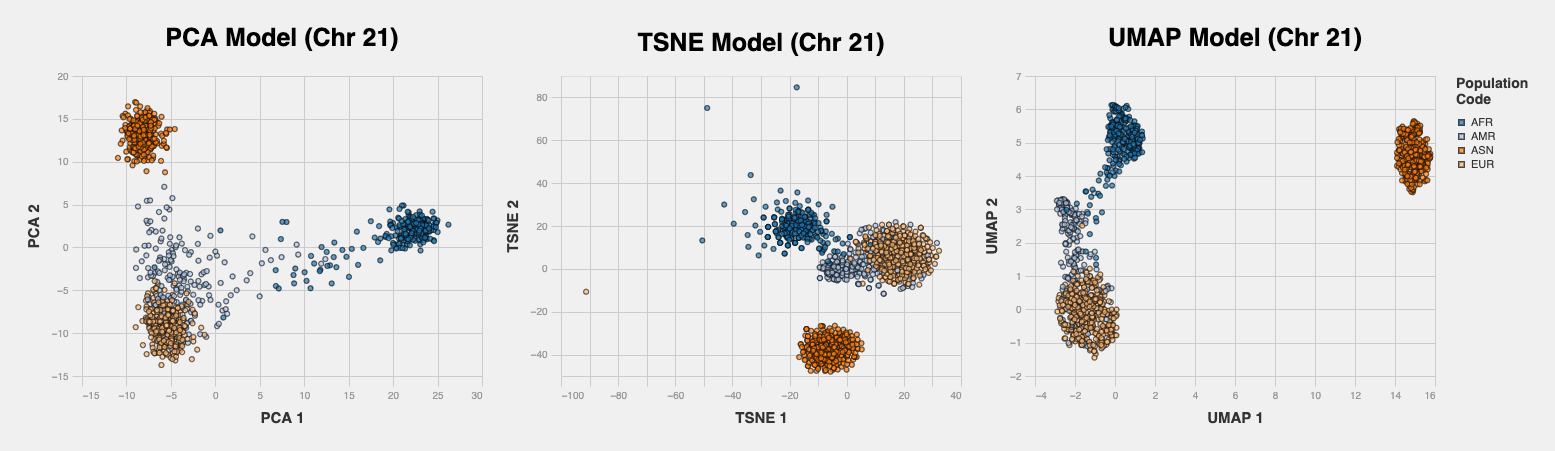

In [10]:
umap_chart = visualize_model(df_vis, "UMAP")
pca_chart = visualize_model(df_vis, "PCA")
tsne_chart = visualize_model(df_vis, "TSNE")

chart = (
    alt.hconcat(
        pca_chart,
        tsne_chart,
        umap_chart, 
        padding = {"left": 25, "right": 25, "bottom": 25, "top": 25}
    )
    .configure_title(
        anchor = alt.TitleAnchor("middle"),
        fontSize = 25 
    )
)

chart